In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
tf.compat.v1.disable_eager_execution()

In [2]:
#reading the datasets
def read_dataset():
    df=pd.read_csv('heart.csv')
    X=df.iloc[: , :-1].values
    y=df.iloc[: ,-1].values
    
    #encode dependent variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y_=encoder.transform(y)
    Y=one_hot_encoder(y_)
    print(X.shape)
    return(X,Y)

In [3]:
#define the encoder function
def one_hot_encoder(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encoder=np.zeros((n_labels,n_unique_labels))
    one_hot_encoder[np.arange(n_labels),labels]=1
    return one_hot_encoder

In [4]:
X,Y=read_dataset()

(303, 13)


In [5]:
#shuffle dataset
X,Y=shuffle(X,Y,random_state=42)

In [6]:
#split data into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=421)

In [7]:
print(xtrain)

[[43.  1.  0. ...  1.  0.  3.]
 [51.  0.  2. ...  2.  0.  2.]
 [55.  1.  0. ...  1.  1.  3.]
 ...
 [58.  1.  1. ...  1.  4.  3.]
 [61.  1.  0. ...  1.  1.  2.]
 [60.  0.  2. ...  2.  1.  2.]]


In [8]:
#check train and test set
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(242, 13)
(242, 2)
(61, 13)


In [9]:
#define important paarmeters & variables to work with tensors
learning_rate=0.2
training_epoch=1000
cost_history=np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]
print('n_dim',n_dim)
n_class=2 #0 and 1
model_path="C://Desktop"

n_dim 13


In [10]:
#define the number of hidden layers & number of neurons for each layer
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60

x=tf.placeholder(shape=[None,n_dim],dtype=tf.float32)
W=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(shape=[None,n_class],dtype=tf.float32)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
def multilayer_perceptron(x,weights,biases):
    #hidden layers with RELU activators
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    #hidden layers with Sigmoid activation
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    #hidden layer with relu activation
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.relu(layer_3)
  
    #output layer with algorithm
    out_layer=tf.matmul(layer_3,weights['out'])+biases['out']
    return out_layer

weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_3,n_class]))
}

biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'out':tf.Variable(tf.truncated_normal([n_class])),
}

In [13]:
#initialize all the values
init=tf.global_variables_initializer()
saver=tf.train.Saver()
#call your defined model
y=multilayer_perceptron(x,weights,biases)
#loss function and optimizer
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
sess=tf.Session()
sess.run(init)

In [21]:
mse_history=[]
accuracy_history=[]
batch_size=1
tf.convert_to_tensor(xtest)

#training the model
for epoch in range (training_epoch):

    sess.run(training_step,feed_dict={x:xtrain,y_:ytrain})
    cost=sess.run(cost_function,feed_dict={x:xtrain,y_:ytrain})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    ypred=sess.run(y,feed_dict={x:xtest})
    '''tf.convert_to_tensor(ypred)'''
    tf.convert_to_tensor(ypred)
    mse=tf.reduce_mean(tf.square(ypred - ytest))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:xtrain,y_:ytrain}))
    accuracy_history.append(accuracy)
    print('epoch=',epoch,'-','cost=',cost,'_mse=',mse_,"train Accuracy=",accuracy)
    print((ypred==ytest).sum()/len(xtest))

epoch= 0 - cost= 0.6278403 _mse= 1.7081375753208765 train Accuracy= 0.61157024
0.0
epoch= 1 - cost= 0.6161946 _mse= 1.6331850643747488 train Accuracy= 0.6487603
0.0
epoch= 2 - cost= 0.6172029 _mse= 1.6813939454539242 train Accuracy= 0.6487603
0.0
epoch= 3 - cost= 0.6145158 _mse= 1.722660936977168 train Accuracy= 0.6528926
0.0
epoch= 4 - cost= 0.62203634 _mse= 1.7202403395384478 train Accuracy= 0.6487603
0.0
epoch= 5 - cost= 0.6112172 _mse= 1.852972005211604 train Accuracy= 0.6570248
0.0
epoch= 6 - cost= 0.6149955 _mse= 1.6706154921001384 train Accuracy= 0.6570248
0.0
epoch= 7 - cost= 0.6178797 _mse= 1.706690763477829 train Accuracy= 0.6487603
0.0
epoch= 8 - cost= 0.6118015 _mse= 1.7654399884162901 train Accuracy= 0.6570248
0.0
epoch= 9 - cost= 0.63313097 _mse= 1.6652786686781857 train Accuracy= 0.59917355
0.0
epoch= 10 - cost= 0.6341911 _mse= 1.7774534562488733 train Accuracy= 0.607438
0.0
epoch= 11 - cost= 0.6273458 _mse= 1.7029328420473144 train Accuracy= 0.607438
0.0
epoch= 12 - cos

epoch= 99 - cost= 0.62068284 _mse= 1.5867188717388616 train Accuracy= 0.6652893
0.0
epoch= 100 - cost= 0.62072 _mse= 1.5778575901782619 train Accuracy= 0.6652893
0.0
epoch= 101 - cost= 0.620706 _mse= 1.5815911228486457 train Accuracy= 0.6652893
0.0
epoch= 102 - cost= 0.6206939 _mse= 1.5855327499842893 train Accuracy= 0.6652893
0.0
epoch= 103 - cost= 0.62068254 _mse= 1.5892281511957156 train Accuracy= 0.6652893
0.0
epoch= 104 - cost= 0.6206706 _mse= 1.5927745397725397 train Accuracy= 0.6652893
0.0
epoch= 105 - cost= 0.6206593 _mse= 1.5958162795269064 train Accuracy= 0.6652893
0.0
epoch= 106 - cost= 0.6206488 _mse= 1.598631658154303 train Accuracy= 0.6652893
0.0
epoch= 107 - cost= 0.6206417 _mse= 1.601250661655598 train Accuracy= 0.6652893
0.0
epoch= 108 - cost= 0.6206413 _mse= 1.6033093257288682 train Accuracy= 0.6652893
0.0
epoch= 109 - cost= 0.62067664 _mse= 1.5940755281452945 train Accuracy= 0.6652893
0.0
epoch= 110 - cost= 0.62066287 _mse= 1.5978221161045898 train Accuracy= 0.665289

epoch= 197 - cost= 0.6202576 _mse= 1.7761925456100722 train Accuracy= 0.6652893
0.0
epoch= 198 - cost= 0.620299 _mse= 1.7835228749259786 train Accuracy= 0.6652893
0.0
epoch= 199 - cost= 0.6203103 _mse= 1.7720036296212849 train Accuracy= 0.6652893
0.0
epoch= 200 - cost= 0.6202902 _mse= 1.777869277187603 train Accuracy= 0.6652893
0.0
epoch= 201 - cost= 0.6202729 _mse= 1.7828424405709762 train Accuracy= 0.6652893
0.0
epoch= 202 - cost= 0.6202543 _mse= 1.7892646419054525 train Accuracy= 0.6652893
0.0
epoch= 203 - cost= 0.6202346 _mse= 1.795000924291047 train Accuracy= 0.6652893
0.0
epoch= 204 - cost= 0.6202651 _mse= 1.8011276653270853 train Accuracy= 0.6652893
0.0
epoch= 205 - cost= 0.6202864 _mse= 1.790710836867296 train Accuracy= 0.6652893
0.0
epoch= 206 - cost= 0.6202654 _mse= 1.7963709645121342 train Accuracy= 0.6652893
0.0
epoch= 207 - cost= 0.6202448 _mse= 1.7998115311083647 train Accuracy= 0.6652893
0.0
epoch= 208 - cost= 0.62022626 _mse= 1.805943258103617 train Accuracy= 0.6652893


epoch= 295 - cost= 0.61997014 _mse= 2.019846607737001 train Accuracy= 0.6652893
0.0
epoch= 296 - cost= 0.61996704 _mse= 2.0223450181424245 train Accuracy= 0.6652893
0.0
epoch= 297 - cost= 0.61996454 _mse= 2.024383646395071 train Accuracy= 0.6652893
0.0
epoch= 298 - cost= 0.61996174 _mse= 2.0291816313023787 train Accuracy= 0.6652893
0.0
epoch= 299 - cost= 0.6199585 _mse= 2.0315285066849667 train Accuracy= 0.6652893
0.0
epoch= 300 - cost= 0.6199554 _mse= 2.033376677183649 train Accuracy= 0.6652893
0.0
epoch= 301 - cost= 0.6199543 _mse= 2.0392672268770964 train Accuracy= 0.6652893
0.0
epoch= 302 - cost= 0.6199506 _mse= 2.039608351052721 train Accuracy= 0.6652893
0.0
epoch= 303 - cost= 0.6199477 _mse= 2.04373435779161 train Accuracy= 0.6652893
0.0
epoch= 304 - cost= 0.6199447 _mse= 2.0458749300647066 train Accuracy= 0.6652893
0.0
epoch= 305 - cost= 0.61994183 _mse= 2.0484853688607854 train Accuracy= 0.6652893
0.0
epoch= 306 - cost= 0.6199388 _mse= 2.0503144211176765 train Accuracy= 0.66528

epoch= 393 - cost= 0.6337394 _mse= 2.94777539132339 train Accuracy= 0.6818182
0.0
epoch= 394 - cost= 0.6336327 _mse= 2.1110955834928173 train Accuracy= 0.6570248
0.0
epoch= 395 - cost= 0.6305865 _mse= 2.048391687919014 train Accuracy= 0.661157
0.0
epoch= 396 - cost= 0.6210136 _mse= 2.424252265910712 train Accuracy= 0.6694215
0.0
epoch= 397 - cost= 0.6212184 _mse= 2.429978461949211 train Accuracy= 0.6694215
0.0
epoch= 398 - cost= 0.6168637 _mse= 2.51934525581326 train Accuracy= 0.6694215
0.0
epoch= 399 - cost= 0.66833174 _mse= 2.3353497342404936 train Accuracy= 0.60330576
0.0
epoch= 400 - cost= 0.6614055 _mse= 3.0789299464482176 train Accuracy= 0.61157024
0.0
epoch= 401 - cost= 0.6444377 _mse= 3.020779200968084 train Accuracy= 0.62396693
0.0
epoch= 402 - cost= 0.65300333 _mse= 3.1106741899854833 train Accuracy= 0.61570245
0.0
epoch= 403 - cost= 0.63528234 _mse= 3.195328632098934 train Accuracy= 0.6446281
0.0
epoch= 404 - cost= 0.6125168 _mse= 2.795980395755269 train Accuracy= 0.677686
0

epoch= 490 - cost= 0.6622276 _mse= 3.481241279732822 train Accuracy= 0.62396693
0.0
epoch= 491 - cost= 0.6511072 _mse= 4.159471400370589 train Accuracy= 0.62396693
0.0
epoch= 492 - cost= 0.6404317 _mse= 3.009691771131256 train Accuracy= 0.62396693
0.0
epoch= 493 - cost= 0.63716316 _mse= 3.6613058104541976 train Accuracy= 0.62396693
0.0
epoch= 494 - cost= 0.63621014 _mse= 3.383245718735974 train Accuracy= 0.62396693
0.0
epoch= 495 - cost= 0.6357415 _mse= 3.5985629344954067 train Accuracy= 0.62396693
0.0
epoch= 496 - cost= 0.63463265 _mse= 3.565330349151399 train Accuracy= 0.6280992
0.0
epoch= 497 - cost= 0.6353957 _mse= 3.7156259084519867 train Accuracy= 0.6322314
0.0
epoch= 498 - cost= 0.6344053 _mse= 3.4962788799110096 train Accuracy= 0.6280992
0.0
epoch= 499 - cost= 0.63313 _mse= 3.711881844295627 train Accuracy= 0.6280992
0.0
epoch= 500 - cost= 0.6353341 _mse= 3.6110372342742436 train Accuracy= 0.62396693
0.0
epoch= 501 - cost= 0.63512075 _mse= 3.7663976499509157 train Accuracy= 0.6

epoch= 587 - cost= 0.6350959 _mse= 3.586132904818872 train Accuracy= 0.62396693
0.0
epoch= 588 - cost= 0.6364839 _mse= 3.5147476627220353 train Accuracy= 0.62396693
0.0
epoch= 589 - cost= 0.6352831 _mse= 3.1387145822947797 train Accuracy= 0.62396693
0.0
epoch= 590 - cost= 0.6346329 _mse= 3.446088333457279 train Accuracy= 0.62396693
0.0
epoch= 591 - cost= 0.63430417 _mse= 3.269718876593813 train Accuracy= 0.62396693
0.0
epoch= 592 - cost= 0.63412654 _mse= 3.4278009818886637 train Accuracy= 0.62396693
0.0
epoch= 593 - cost= 0.63401985 _mse= 3.348017375651796 train Accuracy= 0.62396693
0.0
epoch= 594 - cost= 0.63395226 _mse= 3.432282567283705 train Accuracy= 0.62396693
0.0
epoch= 595 - cost= 0.63390046 _mse= 3.3976739764800072 train Accuracy= 0.62396693
0.0
epoch= 596 - cost= 0.6338586 _mse= 3.4456303624059097 train Accuracy= 0.62396693
0.0
epoch= 597 - cost= 0.63382393 _mse= 3.4331601131053016 train Accuracy= 0.62396693
0.0
epoch= 598 - cost= 0.6337627 _mse= 3.473756946855718 train Accur

epoch= 685 - cost= 0.6303691 _mse= 2.1471223011159632 train Accuracy= 0.6280992
0.0
epoch= 686 - cost= 0.6301989 _mse= 2.16476918451169 train Accuracy= 0.6280992
0.0
epoch= 687 - cost= 0.63004726 _mse= 2.182774236597052 train Accuracy= 0.6280992
0.0
epoch= 688 - cost= 0.629907 _mse= 2.2012672471429173 train Accuracy= 0.6280992
0.0
epoch= 689 - cost= 0.62975824 _mse= 2.216289979054446 train Accuracy= 0.6280992
0.0
epoch= 690 - cost= 0.6296309 _mse= 2.2326392516603595 train Accuracy= 0.6280992
0.0
epoch= 691 - cost= 0.6295087 _mse= 2.2497686077157435 train Accuracy= 0.6280992
0.0
epoch= 692 - cost= 0.6293788 _mse= 2.265759749344562 train Accuracy= 0.6280992
0.0
epoch= 693 - cost= 0.6291784 _mse= 2.2821537900588944 train Accuracy= 0.6280992
0.0
epoch= 694 - cost= 0.62586427 _mse= 2.297847330229874 train Accuracy= 0.6322314
0.0
epoch= 695 - cost= 0.62579596 _mse= 2.295547928101908 train Accuracy= 0.6322314
0.0
epoch= 696 - cost= 0.64423394 _mse= 2.30735079793383 train Accuracy= 0.6280992
0

epoch= 782 - cost= 0.63190687 _mse= 2.2891374721634716 train Accuracy= 0.62396693
0.0
epoch= 783 - cost= 0.6318901 _mse= 2.3066384161797493 train Accuracy= 0.62396693
0.0
epoch= 784 - cost= 0.63188267 _mse= 2.306815812627819 train Accuracy= 0.62396693
0.0
epoch= 785 - cost= 0.63186413 _mse= 2.3219176466822855 train Accuracy= 0.62396693
0.0
epoch= 786 - cost= 0.63184464 _mse= 2.336600020975452 train Accuracy= 0.62396693
0.0
epoch= 787 - cost= 0.6318249 _mse= 2.344645231144541 train Accuracy= 0.62396693
0.0
epoch= 788 - cost= 0.63183093 _mse= 2.3658028036176706 train Accuracy= 0.62396693
0.0
epoch= 789 - cost= 0.63180375 _mse= 2.357533941698907 train Accuracy= 0.62396693
0.0
epoch= 790 - cost= 0.6317785 _mse= 2.3852511433777948 train Accuracy= 0.62396693
0.0
epoch= 791 - cost= 0.63176155 _mse= 2.3839442424999424 train Accuracy= 0.62396693
0.0
epoch= 792 - cost= 0.6317453 _mse= 2.409818381515077 train Accuracy= 0.62396693
0.0
epoch= 793 - cost= 0.6317387 _mse= 2.4006496522865133 train Acc

epoch= 879 - cost= 0.6313988 _mse= 2.54354893385168 train Accuracy= 0.62396693
0.0
epoch= 880 - cost= 0.63138765 _mse= 2.5557677645658337 train Accuracy= 0.62396693
0.0
epoch= 881 - cost= 0.6313826 _mse= 2.5610141622888194 train Accuracy= 0.62396693
0.0
epoch= 882 - cost= 0.63137907 _mse= 2.5562637797199326 train Accuracy= 0.62396693
0.0
epoch= 883 - cost= 0.63146055 _mse= 2.5766031018682476 train Accuracy= 0.62396693
0.0
epoch= 884 - cost= 0.6321479 _mse= 2.4572633453866204 train Accuracy= 0.62396693
0.0
epoch= 885 - cost= 0.63289684 _mse= 2.6726432683890855 train Accuracy= 0.62396693
0.0
epoch= 886 - cost= 0.632139 _mse= 2.4291116317903536 train Accuracy= 0.62396693
0.0
epoch= 887 - cost= 0.6317906 _mse= 2.5842445301617376 train Accuracy= 0.62396693
0.0
epoch= 888 - cost= 0.63162977 _mse= 2.484523728244472 train Accuracy= 0.62396693
0.0
epoch= 889 - cost= 0.63154817 _mse= 2.557976355809922 train Accuracy= 0.62396693
0.0
epoch= 890 - cost= 0.6314998 _mse= 2.519294411799758 train Accur

epoch= 976 - cost= 0.63119584 _mse= 2.6550331360464616 train Accuracy= 0.62396693
0.0
epoch= 977 - cost= 0.63120276 _mse= 2.631671289178371 train Accuracy= 0.62396693
0.0
epoch= 978 - cost= 0.63119555 _mse= 2.6631751660994913 train Accuracy= 0.62396693
0.0
epoch= 979 - cost= 0.6312086 _mse= 2.625198101112422 train Accuracy= 0.62396693
0.0
epoch= 980 - cost= 0.63119566 _mse= 2.6597216130091925 train Accuracy= 0.62396693
0.0
epoch= 981 - cost= 0.6311877 _mse= 2.645292695656213 train Accuracy= 0.62396693
0.0
epoch= 982 - cost= 0.6311985 _mse= 2.6679439932286115 train Accuracy= 0.62396693
0.0
epoch= 983 - cost= 0.6312439 _mse= 2.6143925998172324 train Accuracy= 0.62396693
0.0
epoch= 984 - cost= 0.63122 _mse= 2.6694917256578394 train Accuracy= 0.62396693
0.0
epoch= 985 - cost= 0.63119894 _mse= 2.632876585239917 train Accuracy= 0.62396693
0.0
epoch= 986 - cost= 0.6311851 _mse= 2.6703717285589645 train Accuracy= 0.62396693
0.0
epoch= 987 - cost= 0.6311889 _mse= 2.6553597370273465 train Accura

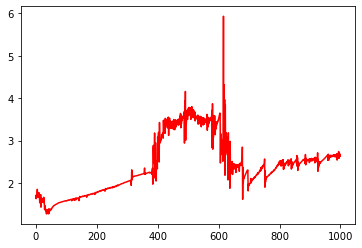

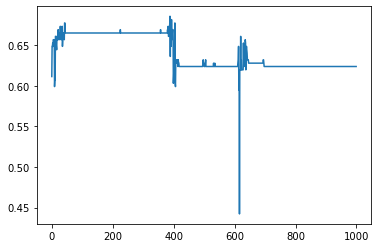

In [22]:
#plot accuracy and mse
plt.plot(mse_history,'r')
plt.show()
plt.plot(accuracy_history)

In [25]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test accuracy=",(sess.run(accuracy,feed_dict={x:xtest,y_:ytest})))

Test accuracy= 0.47540984
